## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

## Pre-Processing

In [9]:
df = pd.read_csv('Geneva_water_pump_data.csv')

In [10]:
df['time'] = pd.to_datetime(df['time'], utc=True)
df['date'] = df['time'].dt.date
df['hour'] = df['time'].dt.time

In [11]:
df

,time,USR_Electricity_SEC.Grid_Power_MA-A-Reactive,USR_Electricity_SEC.Grid_Power_MA-A-Real,USR_Electricity_SEC.Grid_Power_MA-B-Reactive,USR_Electricity_SEC.Grid_Power_MA-B-Real,USR_Electricity_SEC.Grid_Power_MA-C-Reactive,USR_Electricity_SEC.Grid_Power_MA-C-Real,USR_Electricity_SEC.Grid_Power_MB-A-Reactive,USR_Electricity_SEC.Grid_Power_MB-A-Real,USR_Electricity_SEC.Grid_Power_MB-B-Reactive,USR_Electricity_SEC.Grid_Power_MB-B-Real,USR_Electricity_SEC.Grid_Power_MB-C-Reactive,USR_Electricity_SEC.Grid_Power_MB-C-Real,USR_Electricity_SEC.power,USR_Electricity_SEC.rssi,USR_Electricity_SEC.snr,deviceID,date,hour
0,2022-12-19 18:29:35+00:00,-6392.00,-31712.000000,-4504.00,-28640.000000,7496.000000,28320.0,141.25,0.0,158.25,0.000000,0.000038,0.0,32181.704800,-69,7.75,eui-9876b6fffe116ed6,2022-12-19,18:29:35
1,2022-12-19 18:29:42+00:00,-6296.00,-31328.000000,-4728.00,-28768.000000,0.000032,28576.0,0.00,0.0,0.00,0.000000,0.000000,0.0,33392.199320,-67,8.00,eui-9876b6fffe116ed6,2022-12-19,18:29:42
2,2022-12-19 18:29:49+00:00,142.25,0.000000,151.25,-5.210938,0.000038,0.0,0.00,0.0,0.00,0.000000,0.000000,0.0,293.546293,-66,8.00,eui-9876b6fffe116ed6,2022-12-19,18:29:49
3,2022-12-19 18:29:56+00:00,-6104.00,-31328.000000,-4824.00,-28512.000000,7400.000000,28832.0,142.25,0.0,158.25,0.000000,0.000038,0.0,31175.516360,-69,8.00,eui-9876b6fffe116ed6,2022-12-19,18:29:56
4,2022-12-19 18:30:03+00:00,-6136.00,-31328.000000,-4888.00,-28640.000000,0.000032,28832.0,0.00,0.0,0.00,0.000000,0.000000,0.0,33029.972320,-65,8.75,eui-9876b6fffe116ed6,2022-12-19,18:30:03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
542095,2023-03-13 17:11:47+00:00,142.25,-1.239258,163.25,-5.429688,0.000036,0.0,0.00,0.0,0.00,0.000000,0.000000,0.0,305.572818,-65,7.25,eui-9876b6fffe116ed6,2023-03-13,17:11:47
542096,2023-03-13 17:11:54+00:00,148.25,0.000000,156.25,0.000000,0.000036,0.0,0.00,0.0,0.00,0.000000,0.000000,0.0,304.500036,-64,7.50,eui-9876b6fffe116ed6,2023-03-13,17:11:54
542097,2023-03-13 17:12:01+00:00,158.25,0.000000,160.25,-2.136719,-145.750000,0.0,160.25,0.0,155.25,5.007812,0.000034,0.0,488.258475,-64,7.75,eui-9876b6fffe116ed6,2023-03-13,17:12:01
542098,2023-03-13 17:12:08+00:00,155.25,0.000000,156.25,-2.152344,-145.750000,0.0,156.25,0.0,154.25,0.000000,0.000036,0.0,476.254899,-64,7.75,eui-9876b6fffe116ed6,2023-03-13,17:12:08


## Defining The Variables In The DataFrame:

time: Timestamp indicating the date and time of the measurement.

USR_Electricity_SEC.Grid_Power_MA-A-Reactive: Reactive power measured at Meter A for phase A (in Volt-Amperes Reactive, VAR).

USR_Electricity_SEC.Grid_Power_MA-A-Real: Real power measured at Meter A for phase A (in Watts, W).

USR_Electricity_SEC.Grid_Power_MA-B-Reactive: Reactive power measured at Meter A for phase B (in VAR).

USR_Electricity_SEC.Grid_Power_MA-B-Real: Real power measured at Meter A for phase B (in W).

USR_Electricity_SEC.Grid_Power_MA-C-Reactive: Reactive power measured at Meter A for phase C (in VAR).

USR_Electricity_SEC.Grid_Power_MA-C-Real: Real power measured at Meter A for phase C (in W).

USR_Electricity_SEC.Grid_Power_MB-A-Reactive: Reactive power measured at Meter B for phase A (in VAR).

USR_Electricity_SEC.Grid_Power_MB-A-Real: Real power measured at Meter B for phase A (in W).

USR_Electricity_SEC.Grid_Power_MB-B-Reactive: Reactive power measured at Meter B for phase B (in VAR).

USR_Electricity_SEC.Grid_Power_MB-B-Real: Real power measured at Meter B for phase B (in W).

USR_Electricity_SEC.Grid_Power_MB-C-Reactive: Reactive power measured at Meter B for phase C (in VAR).

USR_Electricity_SEC.Grid_Power_MB-C-Real: Real power measured at Meter B for phase C (in W).

USR_Electricity_SEC.power: Total power consumption at the time of measurement (in Watts or VA, depending on whether it refers to real or apparent power).

USR_Electricity_SEC.rssi: Received Signal Strength Indicator (RSSI) representing the strength of the communication signal between the metering device and the data collection system.

USR_Electricity_SEC.snr: Signal-to-Noise Ratio (SNR) indicating the quality of the communication signal between the metering device and the data collection system.

deviceID: Unique identifier for the metering device.

## RQ-1: How does the total power consumption of Meter A and Meter B change over time? Are there any specific events or time periods with unusual power consumption patterns?

In [12]:
df['Total_Power_MA'] = df[[f'USR_Electricity_SEC.Grid_Power_MA-{phase}-Real' for phase in ['A', 'B', 'C']]].sum(axis=1)
df['Total_Power_MB'] = df[[f'USR_Electricity_SEC.Grid_Power_MB-{phase}-Real' for phase in ['A', 'B', 'C']]].sum(axis=1)


In [13]:
precise_time_power = df.groupby('hour')[['Total_Power_MA', 'Total_Power_MB']].mean().reset_index()

In [14]:
precise_time_power

,hour,Total_Power_MA,Total_Power_MB
0,00:00:00,-5467.716553,-0.460286
1,00:00:01,-7623.923706,0.000000
2,00:00:02,-11190.847439,-10045.019748
3,00:00:03,-2.129395,-12933.295759
4,00:00:04,-17566.605050,-12854.523996
...,...,...,...
86369,23:59:55,-17017.649848,-0.637722
86370,23:59:56,-21881.162388,-0.345424
86371,23:59:57,-17690.791295,-1.868652
86372,23:59:58,-6889.047852,0.206445


In [15]:
precise_time_power['hour'] = pd.to_datetime(precise_time_power['hour'], format='%H:%M:%S').dt.time

In [16]:
precise_time_power

,hour,Total_Power_MA,Total_Power_MB
0,00:00:00,-5467.716553,-0.460286
1,00:00:01,-7623.923706,0.000000
2,00:00:02,-11190.847439,-10045.019748
3,00:00:03,-2.129395,-12933.295759
4,00:00:04,-17566.605050,-12854.523996
...,...,...,...
86369,23:59:55,-17017.649848,-0.637722
86370,23:59:56,-21881.162388,-0.345424
86371,23:59:57,-17690.791295,-1.868652
86372,23:59:58,-6889.047852,0.206445


In [17]:
import datetime

In [18]:
def time_to_seconds(time_obj):
    return time_obj.hour * 3600 + time_obj.minute * 60 + time_obj.second

precise_time_power['seconds_since_midnight'] = precise_time_power['hour'].apply(time_to_seconds)
precise_time_power

,hour,Total_Power_MA,Total_Power_MB,seconds_since_midnight
0,00:00:00,-5467.716553,-0.460286,0
1,00:00:01,-7623.923706,0.000000,1
2,00:00:02,-11190.847439,-10045.019748,2
3,00:00:03,-2.129395,-12933.295759,3
4,00:00:04,-17566.605050,-12854.523996,4
...,...,...,...,...
86369,23:59:55,-17017.649848,-0.637722,86395
86370,23:59:56,-21881.162388,-0.345424,86396
86371,23:59:57,-17690.791295,-1.868652,86397
86372,23:59:58,-6889.047852,0.206445,86398


In [19]:
import math

In [20]:
precise_time_power['minutes_since_midnight'] = precise_time_power['seconds_since_midnight'].apply(lambda x: math.floor(x / 60))

In [21]:
precise_time_power

,hour,Total_Power_MA,Total_Power_MB,seconds_since_midnight,minutes_since_midnight
0,00:00:00,-5467.716553,-0.460286,0,0
1,00:00:01,-7623.923706,0.000000,1,0
2,00:00:02,-11190.847439,-10045.019748,2,0
3,00:00:03,-2.129395,-12933.295759,3,0
4,00:00:04,-17566.605050,-12854.523996,4,0
...,...,...,...,...,...
86369,23:59:55,-17017.649848,-0.637722,86395,1439
86370,23:59:56,-21881.162388,-0.345424,86396,1439
86371,23:59:57,-17690.791295,-1.868652,86397,1439
86372,23:59:58,-6889.047852,0.206445,86398,1439


In [22]:
precise_time_power['15min_interval'] = (precise_time_power['minutes_since_midnight'] // 15) * 15
precise_time_power = precise_time_power.groupby('15min_interval')[['Total_Power_MA', 'Total_Power_MB']].mean().reset_index()

In [23]:
precise_time_power

,15min_interval,Total_Power_MA,Total_Power_MB
0,0,-12751.128874,-7980.396062
1,15,-10714.112319,-6947.673623
2,30,-10129.606995,-6779.688967
3,45,-9899.464618,-6726.994228
4,60,-8961.097719,-6847.059498
...,...,...,...
91,1365,-18381.975936,-9216.069041
92,1380,-17466.022634,-8405.430159
93,1395,-16670.982508,-8488.403184
94,1410,-15149.926146,-7905.390106


In [24]:
def minutes_to_time(minutes):
    return datetime.time(hour=minutes // 60, minute=minutes % 60)

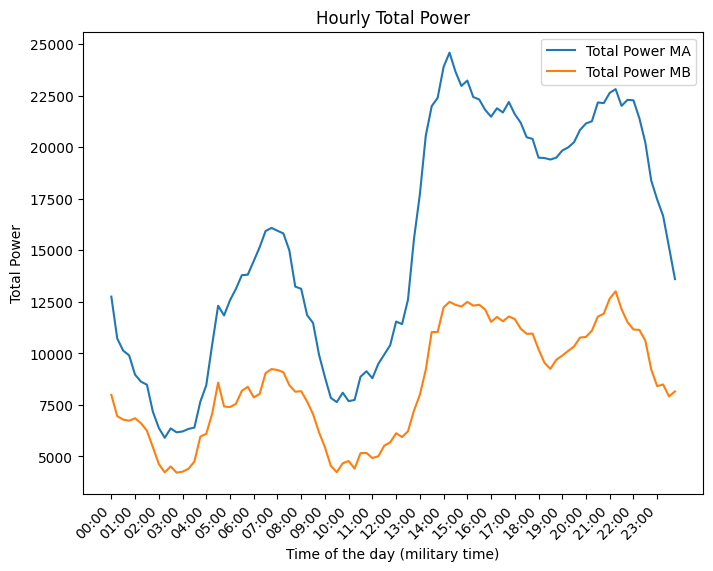

In [25]:
plt.figure(figsize=(8, 6))
plt.plot(precise_time_power['15min_interval'], precise_time_power['Total_Power_MA'] * -1, label='Total Power MA')
plt.plot(precise_time_power['15min_interval'], precise_time_power['Total_Power_MB'] * -1, label='Total Power MB')

plt.xlabel('Time of the day (military time)')
plt.ylabel('Total Power')
plt.title('Hourly Total Power')
plt.legend()

hourly_ticks = np.arange(0, 1381, 60) 
plt.gca().set_xticks(hourly_ticks)

hourly_tick_labels = [minutes_to_time(minutes).strftime('%H:%M') for minutes in hourly_ticks]
plt.gca().set_xticklabels(hourly_tick_labels, rotation=45, ha='right')

plt.show()

## RQ-2: Is there a significant difference in power consumption between weekdays and weekends?


In [26]:
df['weekday'] = df['time'].dt.weekday
df['is_weekend'] = df['weekday'].apply(lambda x: x >= 5).astype(int)

In [27]:
weekend_power = df[df['is_weekend'] == 1][['Total_Power_MA', 'Total_Power_MB']].mean()*-1
weekday_power = df[df['is_weekend'] == 0][['Total_Power_MA', 'Total_Power_MB']].mean()*-1

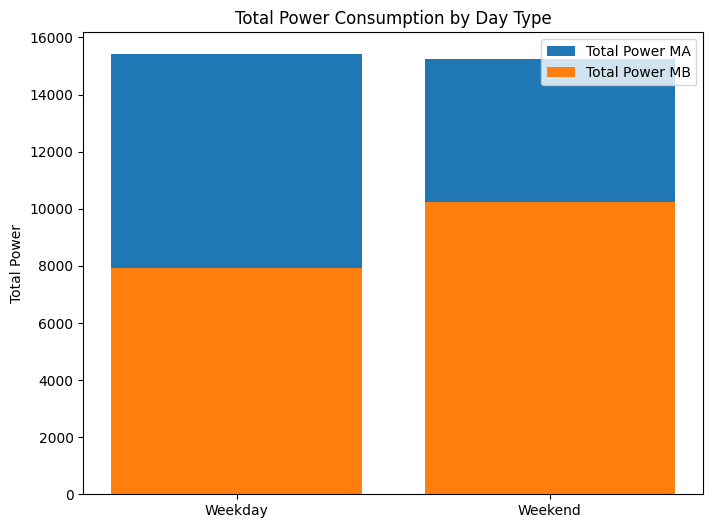

In [28]:
plt.figure(figsize=(8, 6))
plt.bar(['Weekday', 'Weekend'], [weekday_power['Total_Power_MA'], weekend_power['Total_Power_MA']], label='Total Power MA')
plt.bar(['Weekday', 'Weekend'], [weekday_power['Total_Power_MB'], weekend_power['Total_Power_MB']], label='Total Power MB')
plt.ylabel('Total Power')
plt.title('Total Power Consumption by Day Type')
plt.legend()
plt.show()

## RQ-3: Are there any patterns in power consumption over the course of a week?

In [29]:
df['day_of_week'] = df['time'].dt.dayofweek
weekly_mean_power = df.groupby('day_of_week')[['Total_Power_MA', 'Total_Power_MB']].mean().reset_index()

In [30]:
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

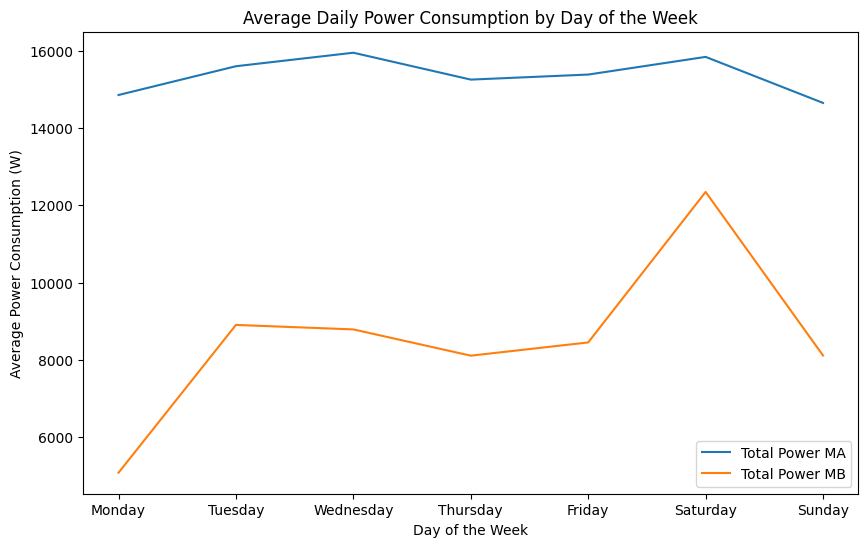

In [31]:
plt.figure(figsize=(10, 6))
plt.plot(weekdays, weekly_mean_power['Total_Power_MA'] * -1, label='Total Power MA')
plt.plot(weekdays, weekly_mean_power['Total_Power_MB'] * -1, label='Total Power MB')
plt.xlabel('Day of the Week')
plt.ylabel('Average Power Consumption (W)')
plt.title('Average Daily Power Consumption by Day of the Week')
plt.legend()
plt.show()

## RQ-4: Are there any specific days with anomalous power consumption patterns when compared to the average consumption?

In [32]:
daily_power = df.groupby('date')[['Total_Power_MA', 'Total_Power_MB']].mean().reset_index()
daily_power['Total_Power'] = daily_power['Total_Power_MA'] + daily_power['Total_Power_MB']


In [33]:
overall_avg_power = daily_power['Total_Power'].mean()
threshold = overall_avg_power * 1.2
anomalous_days = daily_power[(daily_power['Total_Power'] > threshold) | (daily_power['Total_Power'] < overall_avg_power / 1.2)]

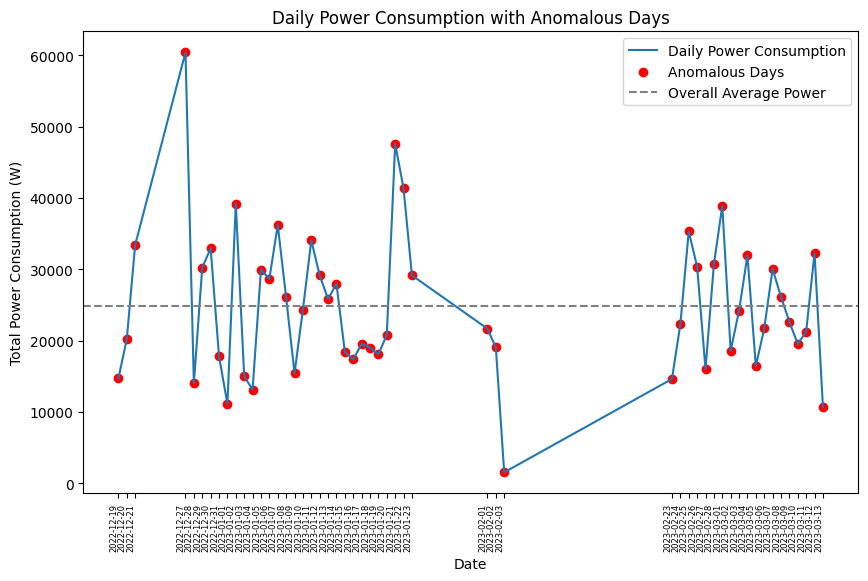

In [34]:
plt.figure(figsize=(10, 6))
plt.plot(daily_power['date'], daily_power['Total_Power']*-1, label='Daily Power Consumption')
plt.scatter(anomalous_days['date'], anomalous_days['Total_Power']*-1, color='red', label='Anomalous Days')

plt.axhline(overall_avg_power*-1, color='gray', linestyle='--', label='Overall Average Power')

plt.xlabel('Date')
plt.ylabel('Total Power Consumption (W)')
plt.title('Daily Power Consumption with Anomalous Days')
plt.legend()

plt.xticks(anomalous_days['date'],rotation=90, ha='right',fontsize=6)
plt.show()

## RQ-5: Are there any specific days or time periods with power consumption patterns that deviate significantly from the majority of the dataset?

In [35]:
df['15min_interval'] = df['time'].dt.hour * 60 + df['time'].dt.minute
df['15min_interval'] = (df['15min_interval'] // 15) * 15
interval_data = df.groupby(['date', '15min_interval'])[['Total_Power_MA', 'Total_Power_MB']].mean().reset_index()

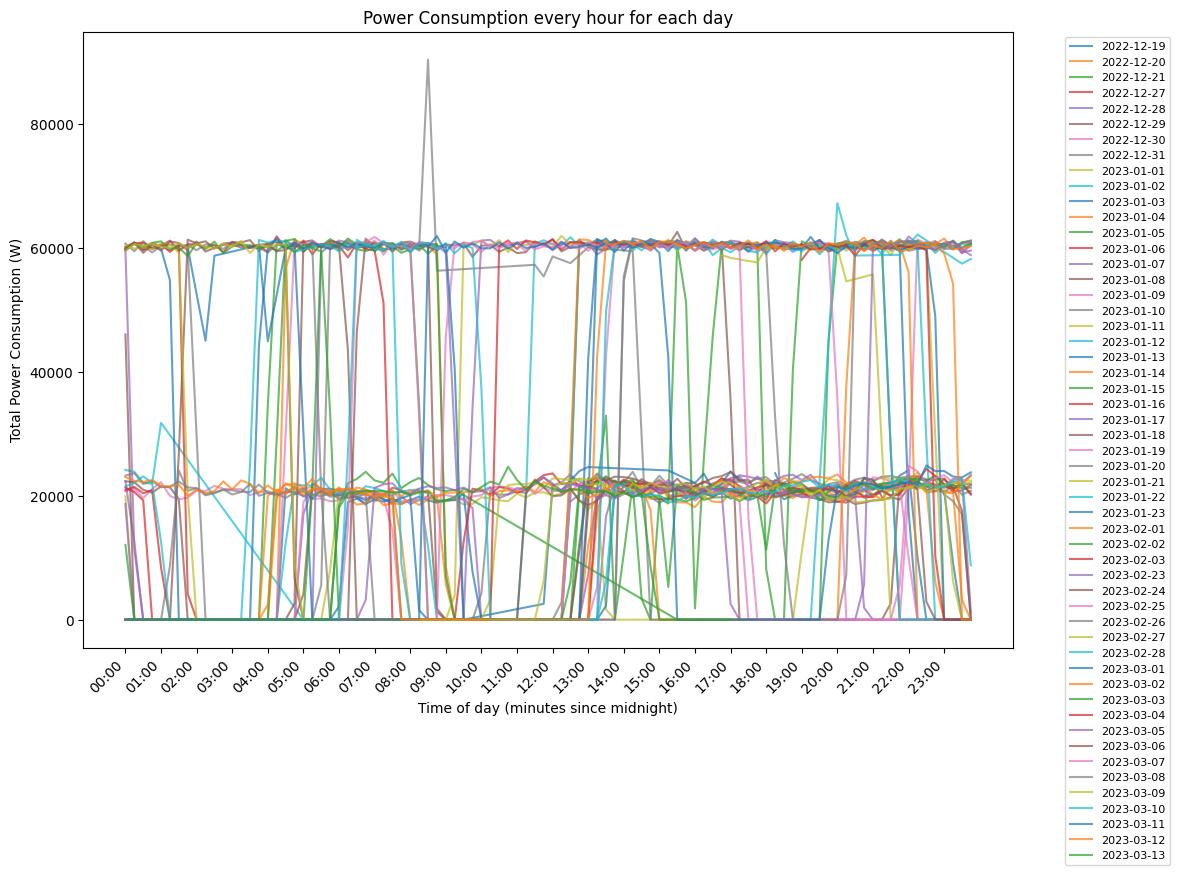

In [36]:
plt.figure(figsize=(12, 8))
unique_dates = interval_data['date'].unique()
for date in unique_dates:
    day_data = interval_data[interval_data['date'] == date]
    plt.plot(day_data['15min_interval'], (day_data['Total_Power_MA'] + day_data['Total_Power_MB']) * -1,
             alpha=0.7, label=date.strftime('%Y-%m-%d'))

plt.xlabel('Time of day (minutes since midnight)')
plt.ylabel('Total Power Consumption (W)')
plt.title('Power Consumption every hour for each day')

hourly_ticks = np.arange(0, 1440, 60)
plt.gca().set_xticks(hourly_ticks)

hourly_tick_labels = [f"{hour:02d}:00" for hour in range(24)]
plt.gca().set_xticklabels(hourly_tick_labels, rotation=45, ha='right')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
plt.show()

Note: Looking at the above graph, I want to find the grey line and light blue lines responsible for the significant peak in power consumptions

Will graph the following grey dates: 2022-12-31. 2023-01-10. 2023-01-20. 2023-02-26. 2023-03-08. 

Will graph the following blue dates: 2023-01-02. 2023-01-12. 2023-01-22. 2023-02-28. 2023-03-10

In [37]:
dates_to_plot = ['2022-12-31', '2023-01-10', '2023-01-20', '2023-02-26', '2023-03-08',
                 '2023-01-02', '2023-01-12', '2023-01-22', '2023-02-28', '2023-03-10']

In [38]:
dates_to_plot = [pd.to_datetime(date) for date in dates_to_plot]

/var/folders/h7/q8xjrt310cz6vyr6k80y1h_80000gn/T/ipykernel_1659/2585086178.py:4: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  if date in dates_to_plot:


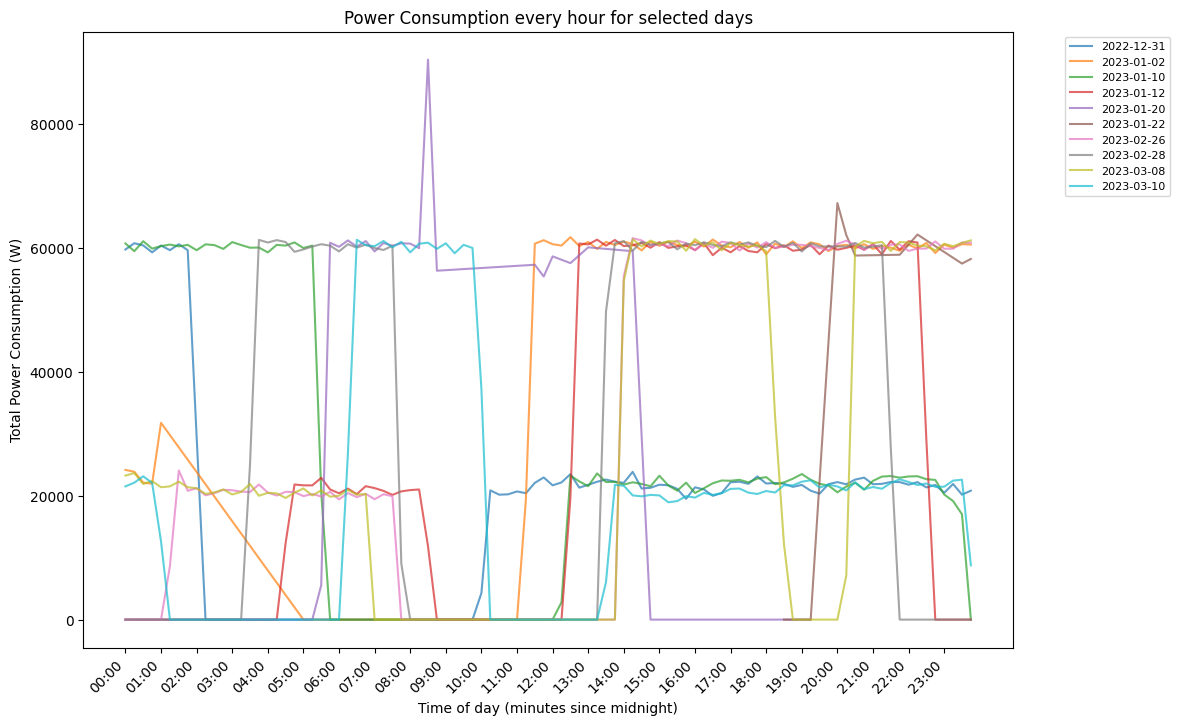

In [39]:
plt.figure(figsize=(12, 8))
unique_dates = interval_data['date'].unique()
for date in unique_dates:
    if date in dates_to_plot:
        day_data = interval_data[interval_data['date'] == date]
        plt.plot(day_data['15min_interval'], (day_data['Total_Power_MA'] + day_data['Total_Power_MB']) * -1,
                 alpha=0.7, label=date.strftime('%Y-%m-%d'))

plt.xlabel('Time of day (minutes since midnight)')
plt.ylabel('Total Power Consumption (W)')
plt.title('Power Consumption every hour for selected days')

hourly_ticks = np.arange(0, 1440, 60)
plt.gca().set_xticks(hourly_ticks)

hourly_tick_labels = [f"{hour:02d}:00" for hour in range(24)]
plt.gca().set_xticklabels(hourly_tick_labels, rotation=45, ha='right')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
plt.show()

These are the dates that have spikes:
- 2023-01-20 (Between 8:00 and 9:00)
- 2023-01-22 (Around 20:00)